# Visualizing the gender gap in college degrees
In this project, we'll visualize the gender gap across college degrees. We will see, how over the time period of 1970 - 2012, how many graduates are Women in various disciplenes of `STEM`, `Liberal Arts` and `Other categories`.

[The Department of Education Statistics](http://nces.ed.gov/programs/digest/2013menu_tables.asp) releases a data set annually containing the percentage of bachelor's degrees granted to women from 1970 to 2012. The data set is broken up into 17 categories of degrees, with each column as a separate category.

Randal Olson, a data scientist at University of Pennsylvania, has cleaned the data set and made it available on his personal website. You can download the dataset Randal compiled [here](http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv).

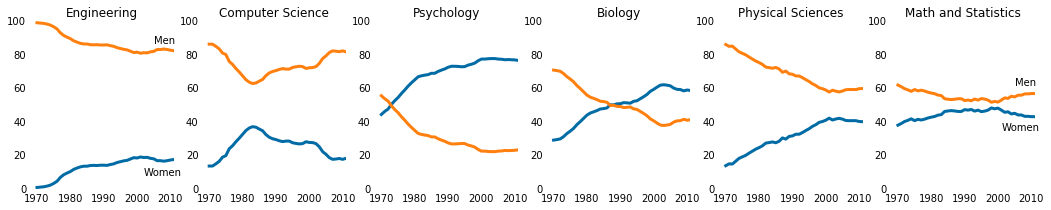

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
plt.show()

As mentioned earlier, the data set contains 17 degrees. For better understanding it can be divided into three categories, `STEM`, `liberal arts` and `Other`. 

In [2]:
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

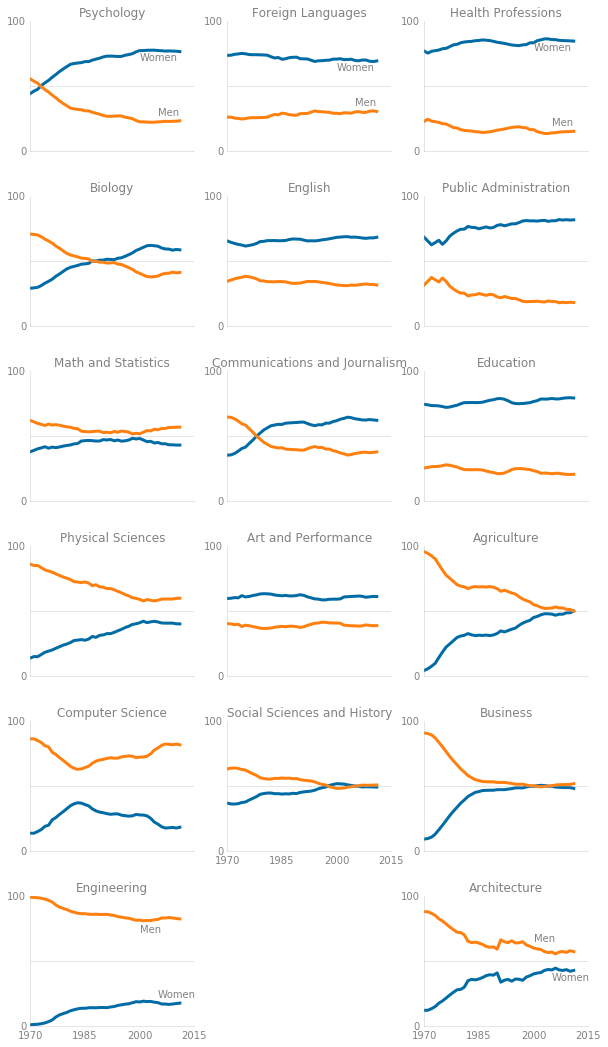

In [7]:
fig, axs = plt.subplots(nrows = 6, ncols = 3, figsize = (10,18))

def plot_in_col(degrees, col):
    '''
    Function to plot a list of degrees within a column
    '''
    for idx, degree in enumerate(degrees):
        axs[idx, col].plot(women_degrees['Year'], women_degrees[degree], c=cb_dark_blue, label='Women', linewidth=3)
        axs[idx, col].plot(women_degrees['Year'], 100 - women_degrees[degree], c=cb_orange, label='Men', linewidth=3)
        axs[idx, col].set_title(degree, color = 'grey', fontweight = 3)
        axs[idx, col].tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
        axs[idx, col].set_yticks([0,100])
        axs[idx, col].set_yticklabels(['0','100'],color= 'grey')
        axs[idx, col].axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
        axs[idx, col].spines["right"].set_visible(False)
        axs[idx, col].spines["top"].set_visible(False)
        axs[idx, col].spines["left"].set_color(c=(171/255, 171/255, 171/255, 0.3))
        axs[idx, col].spines["bottom"].set_color(c=(171/255, 171/255, 171/255, 0.3))
        
        
plot_in_col(stem_cats, 0)
plot_in_col(lib_arts_cats, 1)
plot_in_col(other_cats, 2)
fig.delaxes(axs[5][1])

axs[0][0].text(2000, 70, 'Women', color = 'grey')
axs[0][0].text(2005, 28, 'Men', color = 'grey')

axs[0][1].text(2000, 62, 'Women', color = 'grey')
axs[0][1].text(2005, 35, 'Men', color = 'grey')

axs[0][2].text(2000, 78, 'Women', color = 'grey')
axs[0][2].text(2005, 20, 'Men', color = 'grey')

axs[5][0].text(2000, 72, 'Men', color = 'grey')
axs[5][0].text(2005, 22, 'Women', color = 'grey')

axs[5][2].text(2000, 65, 'Men', color = 'grey')
axs[5][2].text(2005, 35, 'Women', color = 'grey')


def clean_axes(row, col):
    '''
    Function to do repeated cleaning of axes
    '''
    axs[row][col].tick_params(labelbottom = 'on')
    axs[row][col].set_xticks(range(1970, 2016, 15))
    axs[row][col].set_xticklabels(range(1970, 2016, 15), color = 'grey')
    
    
clean_axes(5, 0)
clean_axes(4, 1)
clean_axes(5, 2)

plt.subplots_adjust(hspace=0.35)
plt.savefig("gender_degrees.png", bbox_inches = 'tight', pad_inches=0.2)

### Observations : [The Gender Gap in college degrees](#observation)

![Comparision of gender gap among various college degrees](gender_degrees.png)

#### Gender Gap: Present scenario
In total of 17 degrees, as % of participants 
- overwhelmingly, women lead in 9 degrees namely, `Psychology`, `Foreign Languages`, `Health Professions`, `Biology`, `English`, `Public Administration`, `Communications and Journalism`, `Education` and `Arts and Performance` 
- Men in 3 fields, `Computer science`, `Engineering` and `Physical Sciences` which are incidentally also the fields in which Men have dominated historically
- 5 fields in which gap is very small or non existant in `Maths and statistics`, `Agriculture`, `Social Sciences and history`, `Business` and `Architecture`

#### Gender Gap: Historically 
Following are some of the observations from the visualization of gender gap in college degrees
- Historically Women dominated degrees: There are some fields in which % women graduates were very high i.e fields like `Health prefessions`, `education`, `foreign languages`, `english`
- Historically Men dominated degrees: `Computer science`, `Engineering` and `Physical Sciences`
- `Psychology` used to be a Men dominated field in the early 1970s but Women quickly captured and startted dominating ever since 70s.
- `Agriculture` and `Business`: Practically there were no Women in 1970s, Women have closed the gap and the numbers are almost equal now